In [1]:
import pandas as pd 
import numpy as np
import prepare as prep
import acquire as aq
import wrangle as wg
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = aq.get_zillow_data()

In [3]:
 data.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,logerror,transactiondate
0,4.0,3.5,3100.0,1023282.0,1998.0,11013.72,6059.0,0.025595,2017-01-01
1,2.0,1.0,1465.0,464000.0,1967.0,5672.48,6111.0,0.055619,2017-01-01
2,3.0,2.0,1243.0,564778.0,1962.0,6488.30,6059.0,0.005383,2017-01-01
3,4.0,3.0,2376.0,145143.0,1970.0,1777.51,6037.0,-0.103410,2017-01-01
4,4.0,3.0,2962.0,773303.0,1950.0,9516.26,6037.0,-0.001011,2017-01-01


In [6]:
df = prep.clean_zillow()

In [33]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,logerror,transactiondate,tax_rate,county,state
0,4.0,3.5,3100.0,1023282.0,1998.0,11013.72,6059.0,0.025595,2017-01-01,0.010763,Orange,California
1,2.0,1.0,1465.0,464000.0,1967.0,5672.48,6111.0,0.055619,2017-01-01,0.012225,Ventura,California
2,3.0,2.0,1243.0,564778.0,1962.0,6488.30,6059.0,0.005383,2017-01-01,0.011488,Orange,California
3,4.0,3.0,2376.0,145143.0,1970.0,1777.51,6037.0,-0.103410,2017-01-01,0.012247,Los Angeles,California
4,4.0,3.0,2962.0,773303.0,1950.0,9516.26,6037.0,-0.001011,2017-01-01,0.012306,Los Angeles,California


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         47892 non-null  float64
 1   bathrooms        47892 non-null  float64
 2   area             47892 non-null  float64
 3   tax_value        47892 non-null  float64
 4   year_built       47892 non-null  float64
 5   taxamount        47892 non-null  float64
 6   fips             47892 non-null  float64
 7   logerror         47892 non-null  float64
 8   transactiondate  47892 non-null  object 
 9   tax_rate         47892 non-null  float64
 10  county           47892 non-null  object 
 11  state            47892 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.8+ MB


In [24]:
#Which county has the most houses
train, validate, test = prep.split_data(df)

Text(0.5, 1.0, 'Count of Houses by county')

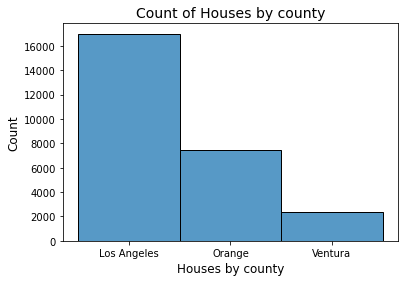

In [25]:
sns.histplot(train.county)
plt.xlabel('Houses by county', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.title('Count of Houses by county', fontsize =14)

In [30]:
train.transactiondate = pd.to_datetime(train.transactiondate)

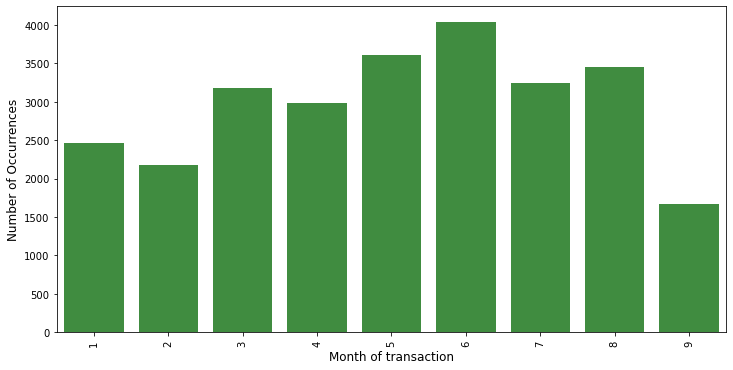

In [32]:
train['transaction_month'] = train['transactiondate'].dt.month

cnt_srs = train['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

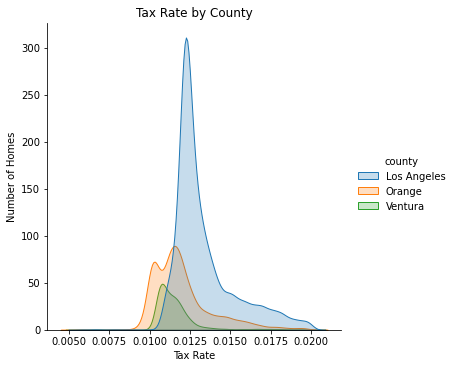

In [37]:
sns.displot(train, x='tax_rate', hue='county', kind ='kde', fill=True)
plt.title('Tax Rate by County')
plt.ylabel('Number of Homes')
plt.xlabel('Tax Rate')
plt.show()





In [ ]:
Hypotheses 